# Diabetes Dataset
Feature descriptions follow:
* xpregnant = Number of times pregnant
* glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* diastolic = Diastolic blood pressure (mm Hg)
* tricep = Triceps skin fold thickness (mm)
* insulin = 2-Hour serum insulin (mu U/ml)
* bmi = Body mass index (weight in kg/(height in m)^2)
* pedigree = a function which scores likelihood of diabetes based on family history
* age = Age (years)
* **diabetes = Target/Dependent Variable: 1:tested positive for diabetes, 0: tested negative for diabetes**

In [17]:
import pandas as pd
df = pd.read_csv('pima_cleaned.csv')
print(df.shape)
print(df.dropna().shape)

(392, 9)
(392, 9)


In [18]:
df.head()

,xpregnant,glucose,diastolic,tricep,insulin,bmi,pedigree,age,diabetes
0,2,108,62,32,56,25.2,0.128,21,0
1,0,137,68,14,148,24.8,0.143,21,0
2,1,89,66,23,94,28.1,0.167,21,0
3,0,139,62,17,210,22.1,0.207,21,0
4,4,99,76,15,51,23.2,0.223,21,0


In [19]:
df.isnull().sum()

xpregnant    0
glucose      0
diastolic    0
tricep       0
insulin      0
bmi          0
pedigree     0
age          0
diabetes     0
dtype: int64

## Suggestions
* Start by understanding what the columns indicate 
* Run the descriptives stats.  Read them CAREFULLY.  What do you learn?
* Run some visualizations, from both matplotlib and seaborn:

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
xpregnant,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
diastolic,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
tricep,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
bmi,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
pedigree,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
diabetes,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


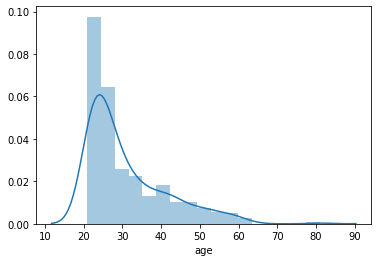

In [20]:
import seaborn as sns
sns.distplot(df.age)

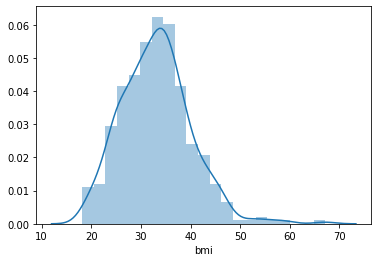

In [6]:
sns.distplot(df.bmi)

In [7]:
df.columns

Index(['xpregnant', 'glucose', 'diastolic', 'tricep', 'insulin', 'bmi',
       'pedigree', 'age', 'diabetes'],
      dtype='object')

In [8]:
temp = df[['xpregnant', 'glucose', 'diastolic', 'tricep', 'insulin', 'bmi','pedigree', \
    'age','diabetes']]
temp.groupby(["diabetes"]).mean() # transpose makes the output easier to read

,xpregnant,glucose,diastolic,tricep,insulin,bmi,pedigree,age
diabetes,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


In [9]:
pd.crosstab(df['diabetes'],df['xpregnant'])

xpregnant,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
diabetes,,,,,,,,,,,,,,,,,
0,37,73,52,26,21,13,15,10,3,5,3,0,2,2,0,0,0
1,19,20,12,19,6,8,4,10,11,6,3,5,3,1,1,1,1


In [10]:
# Start simple
y = df['diabetes']
X = df[['glucose', 'bmi']]

In [11]:
from sklearn import tree
# Do a decision tree 
db_tree = tree.DecisionTreeClassifier(max_depth=2, random_state = 0)
db_tree = db_tree.fit(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


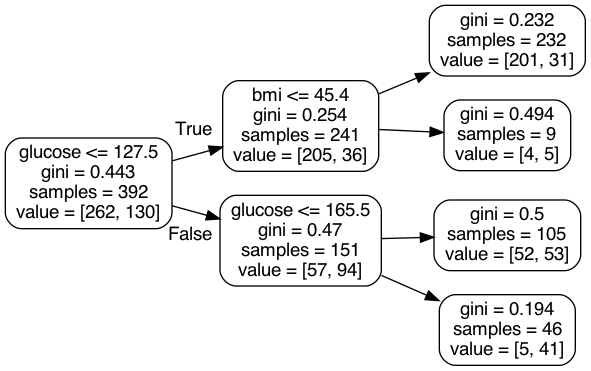

In [12]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(db_tree, out_file=dot_data,  
        feature_names=X.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Examine the gini scores on the above tree carefully.  On the far right, notice that on the third node down, the result is almost split 50/50 (value=[52, 53]) and that the gini score is at its highest: 0.50.  In contrast, the path that does the best classification is the first node with a gini score of 0.194.

Interpreting the above tree looks like this:
* Upper path (for women who have a glucose level <= 127.5, 205/241 do not have diabetes (85/1\%)
  * for women who have a bmi<=45.4, 201/232 do not have diabetes (90.8\%)
  * for women who have a bmi>45.4, 4/9 do not have diabetes (44.4\%)
* Lower path (for women who have a glucose level > 127.5, 57/151 do not have diabetes (37.8\%)
  * for women whose glucose is between 127.5 and 165.6, 52/105 do not have diabetes (50.0\%)
  * for women who glucose is higher than 165.5, 5/(5+41) do not have diabetes (10.9\%)

So clearly there is a relationship between glucose (which is a type of sugar) and diabetes.  Of course, diabetes _is_ actually the inability of the body to process sugar (i.e., low insulin levels), so this shouldn't be too surprising.  

In [13]:
# What was the most important feature?
db_tree.feature_importances_

array([0.94309155, 0.05690845])

Since we listed the X variables (or "features") in the order glucose, bmi, the above indicates that glucose is 95% important, while bmi is only 5% important in classifying whether or not someone has diabetes.

# Predicting an outcome using a decision tree.

We can now use our decision tree model to predict the probability that someone will have diabetes. If we have a 56 year-old woman with a bmi of 32 (obese), what is the probability of being diabetic:

In [16]:
print(db_tree.predict([[56, 32]])) 

[0]


The predict method returns the class for the prediction.  In this case, since 0 indicates a no diabetes and 1 indicates the person is diabetic, this indicates a positive result.

We can actually return the *probability* that the person has diabetes as well.  Note that since the above returned a 1, the probability for diabetes must be >0.50.

In [15]:
db_tree.predict_proba([[122, 30]])

array([[0.86637931, 0.13362069]])

Our model predicts a 55.6\% chance that the women has diabetes.

We can also store the prediction and probability for each person back in the df dataframe:

In [35]:
# The actual prediction: not diabetic (0) or diabetic (1)?
temp = df[['glucose', 'bmi']]
df['predictions'] = db_tree.predict(temp)
# df['probs'] = db_tree.predict_proba(temp)

In [36]:
df.head()

,xpregnant,glucose,diastolic,tricep,insulin,bmi,pedigree,age,diabetes,predictions
0,2,108,62,32,56,25.2,0.128,21,0,0
1,0,137,68,14,148,24.8,0.143,21,0,1
2,1,89,66,23,94,28.1,0.167,21,0,0
3,0,139,62,17,210,22.1,0.207,21,0,1
4,4,99,76,15,51,23.2,0.223,21,0,0


In [37]:
from sklearn.metrics import confusion_matrix
# suggestion: put ACTUAL value first, predictions second.
cm = confusion_matrix(df['diabetes'], df['predictions'])
cm

array([[201,  61],
       [ 31,  99]], dtype=int64)

The above matrix is called a "confusion matrix", and there is a lot to unpack here.  The rows represent the *actual* situation regarding diabetes.  The columns represent the *model's* prediction.  

The diagonal from upper left (201) to lower right (99) , therefore, are the correct predictions.  Of the people who did not have diabetes, we predicted 201 correctly.  They are the "true negatives".  Of the people who had diabetes (second row), we predicted 99 correctly.  They are the "true positives".  The upper right corner, therefore are the false positives: people who do really do NOT have diabetes, but were falsely predicted to have it.  The lower left corner are the false negatives. They represent the group that we diagnose as non-diabetic, but they really are diabetic.  

So how does our model perform?

In [38]:
# So, how accurate is our model?
accuracy = db_tree.score(X,y) 
print("Your decision tree is {:.2f}% accurate.".format(accuracy*100))

Your decision tree is 76.53% accurate.


BTW:

In [205]:
(201 + 99)/(201 + 99 + 31 + 61)

0.7653061224489796

In [206]:
confusion_matrix(df['diabetes'], df['predictions'])

array([[201,  61],
       [ 31,  99]], dtype=int64)

Recall that the rows represent the actual state, so we had 262 people without diabetes and 130 diabetics within our sample.  That means are rows represent the actual numbers, while the columns represent the predictions.  

If someone walks in for a diagnosis, we can throw out the model and still be 262/(262+130) = 67\% accurate simply by always guessing that they dont! That means that if our model isnt AT LEAST this accurate, the model isn't very good.  Of course, the opposite is true for predicting whether someone HAS diabetes.  We will only be accurate about 1/3 of the time, if we guess that they are diabetic.

Referring to our model now, if someone walks in for a diagnosis (i.e., we dont know their true state, but we rely on the model's prediction):
* if our model predicts someone was not diabetic (sum of the first column, n=232), we would be correct 201/232, or about 87\% of the time.  That is a marginal improvement over 67\%. Note that is also means our model gives a false negative 13\% of the time. This is very bad because it means we have told someone with diabetes that they do not have the disease.
* if our model predicts someone IS diabetic (sum of the second column, n=160), we would be correct about 38\% of the time. This is again only a marginal improvement over the base of 33\%. This is also bad, because 62\% of the time we are telling people non-diabetics that they have diabetes.  If we start them on insulin, etc., this would be very dangerous. 

Another way to look at the accuracy of our model is to consider how our model performs, if we already know the outcome (whether the person has diabetes):
* Given that someone is not diabetic (sum of the first row, n=262), our model will be correct 201/262 (77\%) of the time.
* And if someone is diabetic (sum of the second row, n=130), our model will be correct about 76\% of the time.

The moral of the story is that our model isnt great, but it is marginally better than random selection. It would never be used, however, to determine whether someone truly has diabetes!